In [1]:
import tifffile
import numpy as np
import pandas as pd 
import math
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

## Piece the aligned MESMER mask together

In [4]:
DFCI_geomx_scan = tifffile.imread('../data/20240420_Final_DLBCL_TMA_DFCI.ome.tiff')
Rochester_geomx_scan = tifffile.imread('../data/20240420_Final_DLBCL_TMA_Rochester.ome.tiff')

In [7]:
DFCI_geomx_scan.shape

(49152, 49152)

(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot: >,
 <matplotlib.image.AxesImage at 0x7f8dbc78e790>)

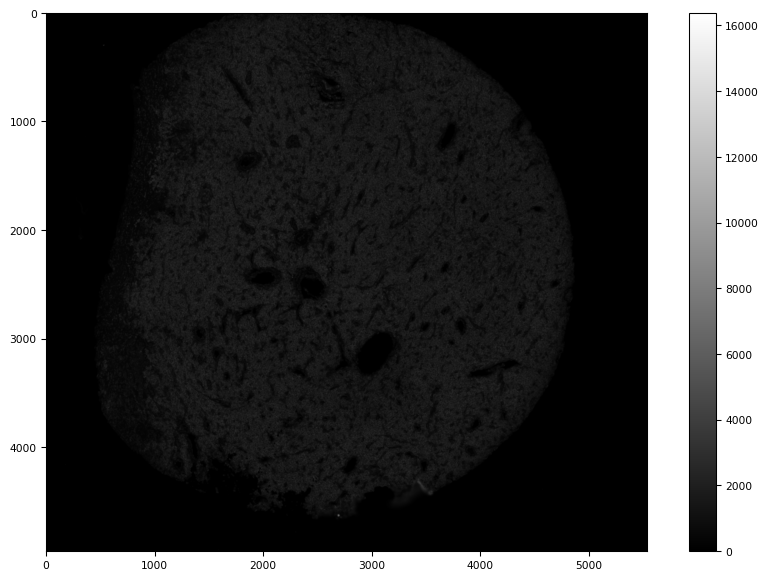

In [20]:
tifffile.imshow(DFCI_geomx_scan[9812:14769, 17745:23280], cmap = 'gray')

In [20]:
DFCI_geomx_core_position = pd.read_csv('../data/DFCI_geomx_position.csv')
Rochester_geomx_core_position = pd.read_csv('../data/Rochester_geomx_position_mask_making.csv')


In [5]:
DFCI_geomx_core_position

,Core,x1,x2,y1,y2
0,1.1,39984,42365,38483,43136
1,1.2,34015,39984,38483,43600
2,2.1,28750,34015,39123,41520
3,2.2,23280,28750,38235,43032
4,3.1,17745,23280,38235,43032
5,3.2,12325,17745,38235,43113
6,4.1,7318,12325,38230,43032
7,5.1,39347,42365,33251,38483
8,5.2,34015,39347,33251,38483
9,6.1,28750,34015,34089,39123


In [21]:
Rochester_geomx_core_position

,Core,x1,x2,y1,y2
0,1,6250,12500,5650,12500
1,2,6250,10650,13800,20700
2,3,6250,11250,22000,28200
3,4,6250,11250,29470,37600
4,5,6250,11250,38240,45770
5,6,11880,19400,38250,45770
6,7,11880,19400,30000,37600
7,8,12500,19400,21930,29460
8,9,12500,18750,14400,20700
9,10,13100,20600,6250,13150


In [2]:
DFCI_core = ["DFCI_1.2", "DFCI_2.2", "DFCI_3.2",
                         "DFCI_4.1", "DFCI_6.1", "DFCI_7.1", "DFCI_8.1", "DFCI_9.1", "DFCI_11.1",
                         "DFCI_12.1", "DFCI_13.2", "DFCI_14.1", "DFCI_15.2", "DFCI_17.1",
                         "DFCI_18.2", "DFCI_19.2", "DFCI_21.1", "DFCI_22.2", "DFCI_23.2", "DFCI_Tonsil1"]

Rochester_core = ["Rochester_1", "Rochester_4", "Rochester_5", "Rochester_6",
                         "Rochester_7", "Rochester_8", "Rochester_9", "Rochester_10",
                         "Rochester_11", "Rochester_12", "Rochester_13", "Rochester_14",
                         "Rochester_15", "Rochester_16", "Rochester_17", "Rochester_18",
                         "Rochester_19", "Rochester_21", "Rochester_22", "Rochester_23",
                         "Rochester_25", "Rochester_TonsilA"]

In [7]:
DFCI_canvas = np.zeros_like(DFCI_geomx_scan, 'uint32')


In [5]:
Rochester_canvas = np.zeros_like(Rochester_geomx_scan, 'uint32')


In [16]:
for core in tqdm(DFCI_core):
    core_num = core.split('_')[1]
    core_seg = tifffile.imread(f'../output/img_registration/fusion_to_geomx/DFCI_mask_making/{core}/DFCI_aligned_MESMER_mask.tiff').astype('uint32')
    x1 = DFCI_geomx_core_position[DFCI_geomx_core_position['Core'] == core_num]['x1'].values[0]
    x2 = DFCI_geomx_core_position[DFCI_geomx_core_position['Core'] == core_num]['x2'].values[0]
    y1 = DFCI_geomx_core_position[DFCI_geomx_core_position['Core'] == core_num]['y1'].values[0]
    y2 = DFCI_geomx_core_position[DFCI_geomx_core_position['Core'] == core_num]['y2'].values[0]
    DFCI_canvas[y1:y2,x1:x2] = core_seg


100%|██████████| 20/20 [00:40<00:00,  2.04s/it]


In [22]:
for core in tqdm(Rochester_core):
    core_num = core.split('_')[1]
    core_seg = tifffile.imread(f'../output/img_registration/fusion_to_geomx/Rochester_mask_making/{core}/Rochester_aligned_MESMER_mask.tiff').astype('uint32')
    x1 = Rochester_geomx_core_position[Rochester_geomx_core_position['Core'] == core_num]['x1'].values[0]
    x2 = Rochester_geomx_core_position[Rochester_geomx_core_position['Core'] == core_num]['x2'].values[0]
    y1 = Rochester_geomx_core_position[Rochester_geomx_core_position['Core'] == core_num]['y1'].values[0]
    y2 = Rochester_geomx_core_position[Rochester_geomx_core_position['Core'] == core_num]['y2'].values[0]
    Rochester_canvas[y1:y2,x1:x2] = core_seg


100%|██████████| 22/22 [00:04<00:00,  4.75it/s]


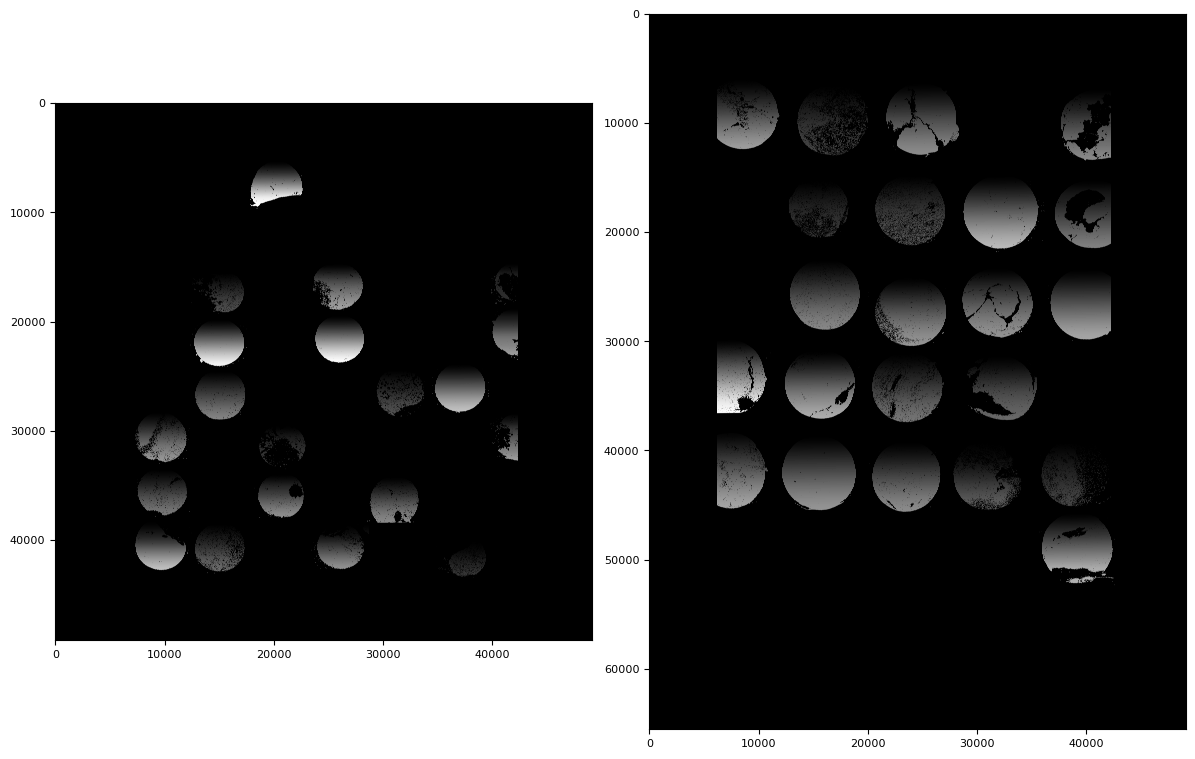

In [102]:
fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(DFCI_canvas, cmap = 'gray')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(Rochester_canvas, cmap = 'gray')
plt.tight_layout()
plt.show()

## Create a dataframe for GeoMX ROI locations

## DFCI

In [67]:
GeoMX_MPP_X = 660/1659

GeoMX_MPP_Y = 785/1970

HALF_WIDTH_PX = 1659/2

HALF_HEIGHT_PX = 1970/2

## Rochester

In [7]:
GeoMX_MPP_X = 660/1652

GeoMX_MPP_Y = 785/1970

HALF_WIDTH_PX = 1652/2

HALF_HEIGHT_PX = 1970/2

## DFCI

In [92]:
data = {'ROI_num' : ['1b', '11a', '12a', '13b', '14a', '15b', '17a', '18b', '19b', '2b', '21a', '22b', '23b', '3b', '4a', '6a', '7a', '8a', '9a', 'Tonsil1'], 
        'ROI_X_cent' : [15296.2,8536.1,4300.4,14962.4,13023.2,6221.7,16419,10138.5,6201.4,10330.6,16425.2,10217.9,6418.3,5629.8,3400,12041.9,7929.7,3496.3,16474.1,8429.2],
        'ROI_Y_cent' : [16463.3,12135.1,11992,10338.6,10536.9,10962.5,7985.6,8467.4,8687.7,16493,5819.1,6252.2,6883.7,16416.3,15920.9,14326.6,14268.7,14047.4,12653.3,2839.2]}

## Rochester

In [36]:
data = {'ROI_num' : ['1','10','11','12','13','14','15','16','17','18','19','21','22','23','25','4','5','6','7','8','9','TonsilA'], 
        'ROI_X_cent' : [4018.7, 5926, 10513.8, 8697.5, 10106.9,9919,8992.1,11741.6,13353.8,13038.6,13583.6,15602.4,16502.1,16035.2,15235.9,3166.1,3204.5,6654.7,6771.6,6061.1,6762.1,15962.3],
        'ROI_Y_cent' : [4033.4,3721,3600,7225.8,10440.3,13533.3,16376.8,17126.5,13392.8,10409.6,7238,3828.9,8058.9,10294.8,17334.4,13387.3,16017.2,16414.8,13059.7,9674.6,6945,19654.4]}

## DFCI

In [93]:
GeoMX_ROI = pd.DataFrame(data)

GeoMX_ROI['ROI_X_cent_px'] = GeoMX_ROI['ROI_X_cent']/GeoMX_MPP_X

GeoMX_ROI['ROI_Y_cent_px'] = GeoMX_ROI['ROI_Y_cent']/GeoMX_MPP_Y

GeoMX_ROI['ROI_X_start_px'] = (GeoMX_ROI['ROI_X_cent_px'] - HALF_WIDTH_PX).apply(math.floor) -5 

GeoMX_ROI['ROI_X_end_px'] = (GeoMX_ROI['ROI_X_cent_px'] + HALF_WIDTH_PX).apply(math.floor) -5

GeoMX_ROI['ROI_Y_start_px'] = (GeoMX_ROI['ROI_Y_cent_px'] - HALF_HEIGHT_PX).apply(math.floor) -9

GeoMX_ROI['ROI_Y_end_px'] = (GeoMX_ROI['ROI_Y_cent_px'] + HALF_HEIGHT_PX).apply(math.floor) -9

GeoMX_ROI['width'] = GeoMX_ROI['ROI_X_end_px'] - GeoMX_ROI['ROI_X_start_px']

GeoMX_ROI['height'] = GeoMX_ROI['ROI_Y_end_px'] - GeoMX_ROI['ROI_Y_start_px']

In [94]:
GeoMX_ROI.to_csv('../output/geomx_binary_mask/DFCI_ROI_position.csv', index=False)

In [117]:
GeoMX_ROI = pd.read_csv('../output/geomx_binary_mask/DFCI_ROI_position_manual.csv')

In [115]:
GeoMX_ROI

,ROI_num,ROI_X_cent,ROI_Y_cent,ROI_X_cent_px,ROI_Y_cent_px,ROI_X_start_px,ROI_X_end_px,ROI_Y_start_px,ROI_Y_end_px,width,height
0,1b,15296.2,16463.3,38449.084545,41315.542675,37604,39263,40321,42291,1659,1970
1,11a,8536.1,12135.1,21456.651364,30453.690446,20621,22280,29459,31429,1659,1970
2,12a,4300.4,11992.0,10809.641818,30094.573248,9975,11634,29100,31070,1659,1970
3,13b,14962.4,10338.6,37610.032727,25945.276433,36765,38424,24951,26921,1659,1970
4,14a,13023.2,10536.9,32735.589091,26442.921019,31891,33550,25448,27418,1659,1970
5,15b,6221.7,10962.5,15639.091364,27510.987261,14804,16463,26516,28486,1659,1970
6,17a,16419.0,7985.6,41271.395455,20040.295541,40426,42085,19046,21016,1659,1970
7,18b,10138.5,8467.4,25484.502273,21249.398726,24645,26304,20255,22225,1659,1970
8,19b,6201.4,8687.7,15588.064545,21802.253503,14753,16412,20808,22778,1659,1970
9,2b,10330.6,16493.0,25967.371818,41390.076433,25127,26786,40396,42366,1659,1970


In [34]:
len(data['ROI_num'])

20

## Rochester

In [37]:
GeoMX_ROI = pd.DataFrame(data)

GeoMX_ROI['ROI_X_cent_px'] = GeoMX_ROI['ROI_X_cent']/GeoMX_MPP_X

GeoMX_ROI['ROI_Y_cent_px'] = GeoMX_ROI['ROI_Y_cent']/GeoMX_MPP_Y

GeoMX_ROI['ROI_X_start_px'] = (GeoMX_ROI['ROI_X_cent_px'] - HALF_WIDTH_PX).apply(math.floor) 

GeoMX_ROI['ROI_X_end_px'] = (GeoMX_ROI['ROI_X_cent_px'] + HALF_WIDTH_PX).apply(math.floor) 

GeoMX_ROI['ROI_Y_start_px'] = (GeoMX_ROI['ROI_Y_cent_px'] - HALF_HEIGHT_PX).apply(math.floor) 

GeoMX_ROI['ROI_Y_end_px'] = (GeoMX_ROI['ROI_Y_cent_px'] + HALF_HEIGHT_PX).apply(math.floor) 

GeoMX_ROI['width'] = GeoMX_ROI['ROI_X_end_px'] - GeoMX_ROI['ROI_X_start_px']

GeoMX_ROI['height'] = GeoMX_ROI['ROI_Y_end_px'] - GeoMX_ROI['ROI_Y_start_px']



In [123]:
GeoMX_ROI.to_csv('../output/geomx_binary_mask/Rochester_ROI_position.csv', index=False)

In [8]:
GeoMX_ROI = pd.read_csv('../output/geomx_binary_mask/Rochester_ROI_position_manual.csv')

In [9]:
GeoMX_ROI

,ROI_num,ROI_X_cent,ROI_Y_cent,ROI_X_cent_px,ROI_Y_cent_px,ROI_X_start_px,ROI_X_end_px,ROI_Y_start_px,ROI_Y_end_px,width,height
0,1,4018.7,4033.4,10058.927879,10122.035669,9232,10884,9132,11102,1652,1970
1,10,5926.0,3721.0,14832.957576,9338.050955,14001,15653,8348,10318,1652,1970
2,11,10513.8,3600.0,26316.360000,9034.394904,25485,27137,8047,10017,1652,1970
3,12,8697.5,7225.8,21770.106061,18133.536306,20939,22591,17138,19108,1652,1970
4,13,10106.9,10440.3,25297.876970,26200.498089,24466,26118,25200,27170,1652,1970
5,14,9919.0,13533.3,24827.557576,33962.549045,23996,25648,32962,34932,1652,1970
6,15,8992.1,16376.8,22507.498788,41098.466242,21679,23331,40091,42061,1652,1970
7,16,11741.6,17126.5,29389.580606,42979.878981,28558,30210,41974,43944,1652,1970
8,17,13353.8,13392.8,33424.966061,33609.956688,32593,34245,32609,34579,1652,1970
9,18,13038.6,10409.6,32636.010909,26123.454777,31805,33457,25128,27098,1652,1970


## Load cellLabel to annotation LUT

In [10]:
TMA_cellLabel_annotation_LUT = pd.read_csv('../output/Annotation/final_annotation5.csv')

In [11]:
TMA_cellLabel_annotation_LUT = TMA_cellLabel_annotation_LUT[['cellLabel', 'coreName', 'Annotation']]

In [12]:
TMA_cellLabel_annotation_LUT

,cellLabel,coreName,Annotation
0,32,DFCI_11.1,CD8mem
1,582,DFCI_11.1,CD8mem
2,1376,DFCI_11.1,CD8mem
3,1866,DFCI_11.1,CD8mem
4,2150,DFCI_11.1,CD8mem
...,...,...,...
1725886,75625,Rochester_TonsilA,M2
1725887,75738,Rochester_TonsilA,M2
1725888,76098,Rochester_TonsilA,M2
1725889,76209,Rochester_TonsilA,M2


In [13]:
TMA_cellLabel_annotation_LUT['Annotation'].unique()

array(['CD8mem', 'Other', 'Tumor', 'Neutrophil', 'Endothelial', 'Treg',
       'CD4naive', 'DC', 'CD8naive', 'CD4mem', 'M2', 'M1', 'Other Tumor',
       'Tumor BCL2', 'Tumor Myc', 'Tumor BCL6', 'B cell'], dtype=object)

In [14]:
DFCI_cellLabel_annotation_LUT = TMA_cellLabel_annotation_LUT[TMA_cellLabel_annotation_LUT['coreName'].str.contains('DFCI')]
Rochester_cellLabel_annotation_LUT = TMA_cellLabel_annotation_LUT[TMA_cellLabel_annotation_LUT['coreName'].str.contains('Rochester')]

In [47]:
DFCI_cellLabel_annotation_LUT[DFCI_cellLabel_annotation_LUT['coreName'].str.contains('DFCI_11.1')][['cellLabel', 'Annotation']].set_index('cellLabel')['Annotation'].to_dict()

{32: 'CD8mem',
 582: 'CD8mem',
 1376: 'CD8mem',
 1866: 'CD8mem',
 2150: 'CD8mem',
 2570: 'CD8mem',
 2883: 'CD8mem',
 3240: 'CD8mem',
 3764: 'CD8mem',
 3934: 'CD8mem',
 5200: 'CD8mem',
 5613: 'CD8mem',
 5819: 'CD8mem',
 5960: 'CD8mem',
 6120: 'CD8mem',
 6208: 'CD8mem',
 6388: 'CD8mem',
 6449: 'CD8mem',
 6513: 'CD8mem',
 6531: 'CD8mem',
 6786: 'CD8mem',
 7061: 'CD8mem',
 7092: 'CD8mem',
 7145: 'CD8mem',
 7220: 'CD8mem',
 7225: 'CD8mem',
 7421: 'CD8mem',
 7926: 'CD8mem',
 8023: 'CD8mem',
 536: 'CD8mem',
 673: 'CD8mem',
 844: 'CD8mem',
 928: 'CD8mem',
 961: 'CD8mem',
 991: 'CD8mem',
 1059: 'CD8mem',
 1069: 'CD8mem',
 1074: 'CD8mem',
 1113: 'CD8mem',
 1289: 'CD8mem',
 1346: 'CD8mem',
 1362: 'CD8mem',
 1378: 'CD8mem',
 1416: 'CD8mem',
 1428: 'CD8mem',
 1499: 'CD8mem',
 1525: 'CD8mem',
 1578: 'CD8mem',
 1623: 'CD8mem',
 1732: 'CD8mem',
 1813: 'CD8mem',
 1814: 'CD8mem',
 1914: 'CD8mem',
 1997: 'CD8mem',
 2086: 'CD8mem',
 2125: 'CD8mem',
 2278: 'CD8mem',
 2442: 'CD8mem',
 2568: 'CD8mem',
 2624:

## Define the color and output name of each cell type you want in the GeoMX segment file name

In [15]:
celltype_color = {
    'CD8mem': '1f77b4',
    'Other': 'ff7f0e',
    'Tumor': '2ca02c',
    'Neutrophil': 'd62728',
    'Endothelial': '9467bd',
    'Treg': '8c564b',
    'CD4naive': 'e377c2',
    'DC': '7f7f7f',
    'CD8naive': 'bcbd22',
    'CD4mem': '17becf',
    'M2': 'aec7e8',
    'M1': 'ffbb78',
    'Other Tumor': '98df8a',
    'Tumor BCL2': 'ff9896',
    'Tumor Myc': 'c5b0d5',
    'Tumor BCL6': 'c49c94',
    'B cell': 'f7b6d2'
}

celltype_outname = {
    'CD8mem': 'CD8mem',
    'Other': 'Other',
    'Tumor': 'Tumor',
    'Neutrophil': 'Neutrophil',
    'Endothelial': 'Endothelial',
    'Treg': 'Treg',
    'CD4naive': 'CD4naive',
    'DC': 'DC',
    'CD8naive': 'CD8naive',
    'CD4mem': 'CD4mem',
    'M2': 'M2',
    'M1': 'M1',
    'Other Tumor': 'TumorOther',
    'Tumor BCL2': 'TumorBCL2',
    'Tumor Myc': 'TumorMyc',
    'Tumor BCL6': 'TumorBCL6',
    'B cell': 'BCell'
}

## Generate binary masks

In [61]:
import re
#for i in ROI_position['ROI_num'].unique():

#GeoMX_ROI['ROI_num'].unique()

for i in GeoMX_ROI['ROI_num'].unique():
    if i.endswith('a'):
        j = re.sub(r"(\d+)a", r"\1.1", i)
    elif i.endswith('b'):
        j = re.sub(r"(\d+)b", r"\1.2", i)
    elif i == 'Tonsil1':
        j = i
    coreName = f"DFCI_{j}"


DFCI_1.2
DFCI_11.1
DFCI_12.1
DFCI_13.2
DFCI_14.1
DFCI_15.2
DFCI_17.1
DFCI_18.2
DFCI_19.2
DFCI_2.2
DFCI_21.1
DFCI_22.2
DFCI_23.2
DFCI_3.2
DFCI_4.1
DFCI_6.1
DFCI_7.1
DFCI_8.1
DFCI_9.1
DFCI_Tonsil1


### DFCI

In [ ]:
from tqdm import tqdm

import re
#for i in ROI_position['ROI_num'].unique():

#GeoMX_ROI['ROI_num'].unique()

for i in GeoMX_ROI['ROI_num'].unique():
    if i.endswith('a'):
        j = re.sub(r"(\d+)a", r"\1.1", i)
    elif i.endswith('b'):
        j = re.sub(r"(\d+)b", r"\1.2", i)
    elif i == 'Tonsil1':
        j = i
    coreName = f"DFCI_{j}"
    cellLabel_annotation_LUT = DFCI_cellLabel_annotation_LUT[DFCI_cellLabel_annotation_LUT['coreName'] == coreName][['cellLabel', 'Annotation']]
    cellLabel_annotation_LUT = cellLabel_annotation_LUT.set_index('cellLabel')['Annotation'].to_dict()
    print(f'Working on ROI {i}')
    row_idx = GeoMX_ROI['ROI_num'] == i
    x_start = GeoMX_ROI[row_idx]['ROI_X_start_px'].values[0]
    x_end = GeoMX_ROI[row_idx]['ROI_X_end_px'].values[0]
    y_start = GeoMX_ROI[row_idx]['ROI_Y_start_px'].values[0]
    y_end = GeoMX_ROI[row_idx]['ROI_Y_end_px'].values[0]

    print(f'ROI location: ({x_start}, {x_end}, {y_start}, {y_end})')

    #print(f'ROI pixel: {np.size(sub_seg)}')

    width = x_end - x_start
    
    height = y_end - y_start

    print(f'ROI size in pixel: {width} by {height}')

    #if width < 1614:
    #    print('Extend width by adjusting X start by 1px')
    #    x_start = x_start - 1
    #if height < 1614:
    #    print('Extend height by adjusting Y start by 1px')
    #    y_start = y_start - 1
    
    #print(f'New ROI location: ({x_start}, {x_end}, {y_start}, {y_end})')

    #width = x_end - x_start
    
    #height = y_end - y_start

    #print(f'ROI size in pixel: {width} by {height}')

    print(f'Subset segmentation mask')

    seg_sub = DFCI_canvas[y_start:y_end, x_start:x_end]

    print(f'Segmentation size in px: {seg_sub.shape[1]} by {seg_sub.shape[0]}')

    # Iterate through all cell types in ROI

    ROI_cellLabel = pd.DataFrame(seg_sub.flatten(), columns = ['cellLabel'])

    # Filter out background whose cellLabel == 0

    # ROI_cellLabel = ROI_cellLabel[ROI_cellLabel['cellLabel'] != 0]

    #ROI_cellLabel.to_csv(os.path.join('./ROI_extracted_cellLabel', f'ROI_{i}.csv'))

    # Get unique cell types in ROI

    ROI_cellLabel['Annotation'] = ROI_cellLabel['cellLabel'].map(cellLabel_annotation_LUT)

    ROI_cellLabel_celltype_unique = ROI_cellLabel.drop_duplicates()

    print(f'Cell count in ROI {i}:')

    celltype_count = ROI_cellLabel_celltype_unique.groupby('Annotation').size().sort_values()

    print(celltype_count)

    extraction_order = celltype_count[celltype_count > 20].index.values

    if 'Other' in extraction_order:
        print('Put Other celltype at the end of extraction order')
        idx_other = np.where(extraction_order == 'Other')[0]
        extraction_order = np.delete(extraction_order, idx_other)
        extraction_order = np.append(extraction_order, 'Other')



    print(f'Extraction order after excluding cells < 20: {extraction_order}')

    for celltype in extraction_order:

        print(f'Generating mask for {celltype}')
        
        binary_matrix = (ROI_cellLabel['Annotation'] == celltype).astype(int).values.reshape(seg_sub.shape).astype('uint8')*255
        
        output_dir = f'../output/geomx_binary_mask/DFCI/ROI_{i}'
        if os.path.exists(output_dir) == False:
            os.makedirs(output_dir)
        
        extraction_idx = np.where(extraction_order == celltype)[0][0] + 1

        print(f'Generating mask for {celltype}. Extraction order: {extraction_idx}')

        ROI_name = f"{i}"

        output_name = f'{ROI_name}_{celltype_outname[celltype]}_{extraction_idx}_{celltype_color[celltype]}.tiff'

        tifffile.imwrite(os.path.join(output_dir, output_name), binary_matrix)

        

        









### Rochester

In [19]:
Rochester_cellLabel_annotation_LUT[Rochester_cellLabel_annotation_LUT['coreName'] == 'Rochester_1'][['cellLabel', 'Annotation']]

,cellLabel,Annotation
1357,103,CD8mem
1358,248,CD8mem
1359,602,CD8mem
1360,608,CD8mem
1361,684,CD8mem
...,...,...
1106212,67418,Tumor BCL2
1106213,67519,Tumor BCL2
1106214,67546,Other Tumor
1106215,67652,Tumor BCL2


In [23]:
from tqdm import tqdm

import re
#for i in ROI_position['ROI_num'].unique():

#GeoMX_ROI['ROI_num'].unique()

for i in GeoMX_ROI['ROI_num'].unique():
    coreName = f"Rochester_{i}"
    cellLabel_annotation_LUT = Rochester_cellLabel_annotation_LUT[Rochester_cellLabel_annotation_LUT['coreName'] == coreName][['cellLabel', 'Annotation']]
    cellLabel_annotation_LUT = cellLabel_annotation_LUT.set_index('cellLabel')['Annotation'].to_dict()
    print(f'Working on ROI {i}')
    row_idx = GeoMX_ROI['ROI_num'] == i
    x_start = GeoMX_ROI[row_idx]['ROI_X_start_px'].values[0]
    x_end = GeoMX_ROI[row_idx]['ROI_X_end_px'].values[0]
    y_start = GeoMX_ROI[row_idx]['ROI_Y_start_px'].values[0]
    y_end = GeoMX_ROI[row_idx]['ROI_Y_end_px'].values[0]

    print(f'ROI location: ({x_start}, {x_end}, {y_start}, {y_end})')

    #print(f'ROI pixel: {np.size(sub_seg)}')

    width = x_end - x_start
    
    height = y_end - y_start

    print(f'ROI size in pixel: {width} by {height}')

    #if width < 1614:
    #    print('Extend width by adjusting X start by 1px')
    #    x_start = x_start - 1
    #if height < 1614:
    #    print('Extend height by adjusting Y start by 1px')
    #    y_start = y_start - 1
    
    #print(f'New ROI location: ({x_start}, {x_end}, {y_start}, {y_end})')

    #width = x_end - x_start
    
    #height = y_end - y_start

    #print(f'ROI size in pixel: {width} by {height}')

    print(f'Subset segmentation mask')

    seg_sub = Rochester_canvas[y_start:y_end, x_start:x_end]

    print(f'Segmentation size in px: {seg_sub.shape[1]} by {seg_sub.shape[0]}')

    # Iterate through all cell types in ROI

    ROI_cellLabel = pd.DataFrame(seg_sub.flatten(), columns = ['cellLabel'])

    # Filter out background whose cellLabel == 0

    # ROI_cellLabel = ROI_cellLabel[ROI_cellLabel['cellLabel'] != 0]

    #ROI_cellLabel.to_csv(os.path.join('./ROI_extracted_cellLabel', f'ROI_{i}.csv'))

    # Get unique cell types in ROI

    ROI_cellLabel['Annotation'] = ROI_cellLabel['cellLabel'].map(cellLabel_annotation_LUT)

    ROI_cellLabel_celltype_unique = ROI_cellLabel.drop_duplicates()

    print(f'Cell count in ROI {i}:')

    celltype_count = ROI_cellLabel_celltype_unique.groupby('Annotation').size().sort_values()

    print(celltype_count)

    extraction_order = celltype_count[celltype_count > 20].index.values

    if 'Other' in extraction_order:
        print('Put Other celltype at the end of extraction order')
        idx_other = np.where(extraction_order == 'Other')[0]
        extraction_order = np.delete(extraction_order, idx_other)
        extraction_order = np.append(extraction_order, 'Other')



    print(f'Extraction order after excluding cells < 20: {extraction_order}')

    for celltype in extraction_order:

        print(f'Generating mask for {celltype}')
        
        binary_matrix = (ROI_cellLabel['Annotation'] == celltype).astype(int).values.reshape(seg_sub.shape).astype('uint8')*255
        
        output_dir = f'../output/geomx_binary_mask/Rochester_corrected/ROI_{i}'
        if os.path.exists(output_dir) == False:
            os.makedirs(output_dir)
        
        extraction_idx = np.where(extraction_order == celltype)[0][0] + 1

        print(f'Generating mask for {celltype}. Extraction order: {extraction_idx}')

        ROI_name = f"{i}"

        output_name = f'{ROI_name}_{celltype_outname[celltype]}_{extraction_idx}_{celltype_color[celltype]}.tiff'

        tifffile.imwrite(os.path.join(output_dir, output_name), binary_matrix)

        

        









Working on ROI 1
ROI location: (9232, 10884, 9132, 11102)
ROI size in pixel: 1652 by 1970
Subset segmentation mask
Segmentation size in px: 1652 by 1970
Cell count in ROI 1:
Annotation
Tumor BCL6        7
Other Tumor      11
Neutrophil       12
CD4naive         17
CD8naive         20
Tumor BCL2       21
M1              123
Treg            246
DC              277
Other           484
M2              529
Endothelial     627
CD8mem         2112
CD4mem         2900
dtype: int64
Put Other celltype at the end of extraction order
Extraction order after excluding cells < 20: ['Tumor BCL2' 'M1' 'Treg' 'DC' 'M2' 'Endothelial' 'CD8mem' 'CD4mem'
 'Other']
Generating mask for Tumor BCL2
Generating mask for Tumor BCL2. Extraction order: 1
Generating mask for M1
Generating mask for M1. Extraction order: 2
Generating mask for Treg
Generating mask for Treg. Extraction order: 3
Generating mask for DC
Generating mask for DC. Extraction order: 4
Generating mask for M2
Generating mask for M2. Extraction ord

In [41]:
for core in GeoMX_ROI['ROI_num']:
    core_name = f"DFCI_{core}"
    print(core_name)

DFCI_1.2
DFCI_11.1
DFCI_12.1
DFCI_13.2
DFCI_14.1
DFCI_15.2
DFCI_17.1
DFCI_18.2
DFCI_19.2
DFCI_2.2
DFCI_21.1
DFCI_22.2
DFCI_23.2
DFCI_3.2
DFCI_4.1
DFCI_6.1
DFCI_7.1
DFCI_8.1
DFCI_9.1
DFCI_Tonsil


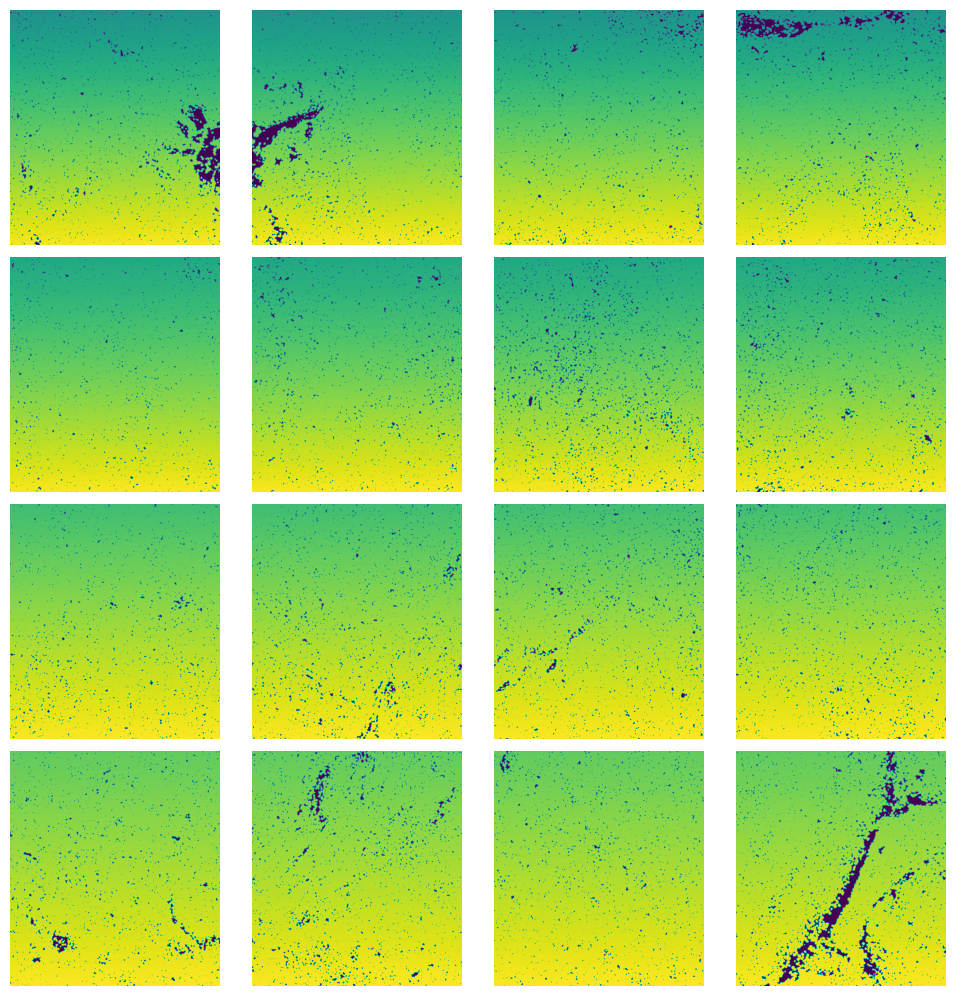

In [11]:
import matplotlib.pyplot as plt

def plot_images(images, num_rows, num_cols, titles=None, figsize=(10, 10)):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    
    for i, (img, ax) in enumerate(zip(images, axes)):
        ax.imshow(img)
        ax.axis('off')
        if titles:
            ax.set_title(titles[i])
    
    plt.tight_layout()
    plt.show()

# Example usage
num_rows = 4
num_cols = 4

plot_images(mask_list, num_rows, num_cols)

In [195]:

#for i in ROI_position['ROI_num'].unique():

#GeoMX_ROI['ROI_num'].unique()

for i in GeoMX_ROI['ROI_num'].unique():
    print(f'Working on ROI {i}')
    row_idx = GeoMX_ROI['ROI_num'] == i
    x_start = GeoMX_ROI[row_idx]['ROI_X_start_px'].values[0]
    x_end = GeoMX_ROI[row_idx]['ROI_X_end_px'].values[0]
    y_start = GeoMX_ROI[row_idx]['ROI_Y_start_px'].values[0]
    y_end = GeoMX_ROI[row_idx]['ROI_Y_end_px'].values[0]

    print(f'ROI location: ({x_start}, {x_end}, {y_start}, {y_end})')

    #print(f'ROI pixel: {np.size(sub_seg)}')

    width = x_end - x_start
    
    height = y_end - y_start

    print(f'ROI size in pixel: {width} by {height}')

    #if width < 1614:
    #    print('Extend width by adjusting X start by 1px')
    #    x_start = x_start - 1
    #if height < 1614:
    #    print('Extend height by adjusting Y start by 1px')
    #    y_start = y_start - 1
    
    #print(f'New ROI location: ({x_start}, {x_end}, {y_start}, {y_end})')

    #width = x_end - x_start
    
    #height = y_end - y_start

    #print(f'ROI size in pixel: {width} by {height}')

    print(f'Subset segmentation mask')

    seg_sub = seg_mask[y_start:y_end, x_start:x_end]

    print(f'Segmentation size in px: {seg_sub.shape[1]} by {seg_sub.shape[0]}')

    # Iterate through all cell types in ROI

    ROI_cellLabel = pd.DataFrame(seg_sub.flatten(), columns = ['cellLabel'])

    # Filter out background whose cellLabel == 0

    # ROI_cellLabel = ROI_cellLabel[ROI_cellLabel['cellLabel'] != 0]

    #ROI_cellLabel.to_csv(os.path.join('./ROI_extracted_cellLabel', f'ROI_{i}.csv'))

    # Get unique cell types in ROI

    ROI_cellLabel['Annotation'] = ROI_cellLabel['cellLabel'].map(cellLabel_annotation_LUT)

    ROI_cellLabel_celltype_unique = ROI_cellLabel.drop_duplicates()

    print(f'Cell count in ROI {i}:')

    celltype_count = ROI_cellLabel_celltype_unique.groupby('Annotation').size().sort_values()

    print(celltype_count)

    extraction_order = celltype_count[celltype_count > 20].index.values

    if 'Other' in extraction_order:
        print('Put Other celltype at the end of extraction order')
        idx_other = np.where(extraction_order == 'Other')[0]
        extraction_order = np.delete(extraction_order, idx_other)
        extraction_order = np.append(extraction_order, 'Other')



    print(f'Extraction order after excluding cells < 20: {extraction_order}')

    for celltype in extraction_order:

        print(f'Generating mask for {celltype}')
        
        binary_matrix = (ROI_cellLabel['Annotation'] == celltype).astype(int).values.reshape(seg_sub.shape).astype('uint8')*255
        
        output_dir = os.path.join(f'/mnt/nfs/home/huayingqiu/INDEPTH/run_031124/GeoMX_binary_masks/L25_shift/ROI_{i}')
        if os.path.exists(output_dir) == False:
            os.makedirs(output_dir)
        
        extraction_idx = np.where(extraction_order == celltype)[0][0] + 1

        print(f'Generating mask for {celltype}. Extraction order: {extraction_idx}')

        ROI_name = f"{i:03d}"

        output_name = f'{ROI_name}_{celltype_outname[celltype]}_{extraction_idx}_{celltype_color[celltype]}.tiff'

        tifffile.imwrite(os.path.join(output_dir, output_name), binary_matrix)

        

        









Working on ROI 0
ROI location: (16129, 17788, 10565, 12422)
ROI size in pixel: 1659 by 1857
Subset segmentation mask
Segmentation size in px: 1659 by 1857
Cell count in ROI 0:
Annotation
M2                25
Myeloid           79
M1               147
Endothelial      191
BCL6+ B Cell     229
CD4 Treg         231
CD8 T            262
DC               727
Other            886
CD4 T           1117
BCL6- B Cell    4736
dtype: int64
Put Other celltype at the end of extraction order
Extraction order after excluding cells < 20: ['M2' 'Myeloid' 'M1' 'Endothelial' 'BCL6+ B Cell' 'CD4 Treg' 'CD8 T' 'DC'
 'CD4 T' 'BCL6- B Cell' 'Other']
Generating mask for M2
Generating mask for M2. Extraction order: 1
Generating mask for Myeloid
Generating mask for Myeloid. Extraction order: 2
Generating mask for M1
Generating mask for M1. Extraction order: 3
Generating mask for Endothelial
Generating mask for Endothelial. Extraction order: 4
Generating mask for BCL6+ B Cell
Generating mask for BCL6+ B Cell. Extr